# Project: TMDb set

## Table of content
<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#wrangling'>Data Wrangling</a></li>
    <li><a href='#eda'>Explantory Data Analysis</a></li>
    <li><a href='#conclusions'>Conclusions</a></li>

<a id='intro'></a>
## Introduction
> For this project this project will be analysing the data connected with the website [TMDd](https://www.themoviedb.org/). I'm going to be paying more attention to the particular set of movies that became popular and if it affected their revenue to increase, since the majority watched them.



## Questions For Analysis
>In this analysis, the process will be used to answer these questions:
<ul>
    <li>What is the relationship between release year and popularity of movies?</li>
    <li>Are the movies that used the highest budget also also the movies that got best revenue back?</li>
    

>Firstly I'll import the libaries I will be needing for this analysis.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

> In this section I'm going to load in the data I chose for the analysis.The data was downloaded and upload into jupyter (r"Path where CSV folder is\data_name.csv") on my pc.
I'll also check for neatness and if it's not, I'll clean the data set

In [152]:
#Loading data and also inspecting data set
df = pd.read_csv(r"C:\Users\user\Downloads\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>The data has been loaded and inspected!. 

In [153]:
#Checking for the dimension of the data
df.shape

(10866, 21)

In [154]:
#Checking the description of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [155]:
#Using the .info() method to get information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [156]:
#dropping the colunms I won't be needing for this analysis
df.drop(['imdb_id', 'cast', 'homepage', 'director', 'runtime', 'production_companies', 'keywords', 'tagline','release_date', 'overview'], axis = 1, inplace = True)
df.head(10)

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Western|Drama|Adventure|Thriller,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Drama|Adventure|Science Fiction,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Family|Animation|Adventure|Comedy,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Comedy|Animation|Family,3935,8.0,2015,1.609999e+08,7.854116e+08


In [157]:
#Checking for matching data and dropping them
df.duplicated().sum()

1

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   genres          10843 non-null  object 
 6   vote_count      10866 non-null  int64  
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 933.9+ KB


In [159]:
df.drop_duplicates(inplace=True)
df.head()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [160]:
#Checking for absent values
df.isnull()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,False,False,False,False


In [161]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of           id  popularity  budget  revenue  original_title  genres  vote_count  \
0      False       False   False    False           False   False       False   
1      False       False   False    False           False   False       False   
2      False       False   False    False           False   False       False   
3      False       False   False    False           False   False       False   
4      False       False   False    False           False   False       False   
...      ...         ...     ...      ...             ...     ...         ...   
10861  False       False   False    False           False   False       False   
10862  False       False   False    False           False   False       False   
10863  False       False   False    False           False   False       False   
10864  False       False   False    False           False   False       False   
10865  False       False   False    False      

In [162]:
df.isnull().any(axis=1)

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10865, dtype: bool

In [163]:
#Eliminating rows with null values
df.dropna(inplace = True)
df.shape

(10842, 11)

In [164]:
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

>There are no longer any null value, and the shape has also been reduced (10866, 21) to (10842, 11) rows and colunms

<a id='eda'></a>
## Exploratory Data Analysis (EDA)
> Now that my data is neat, I'm going to move on to exploration and make visualizations with the aim of directing it to my research questions.

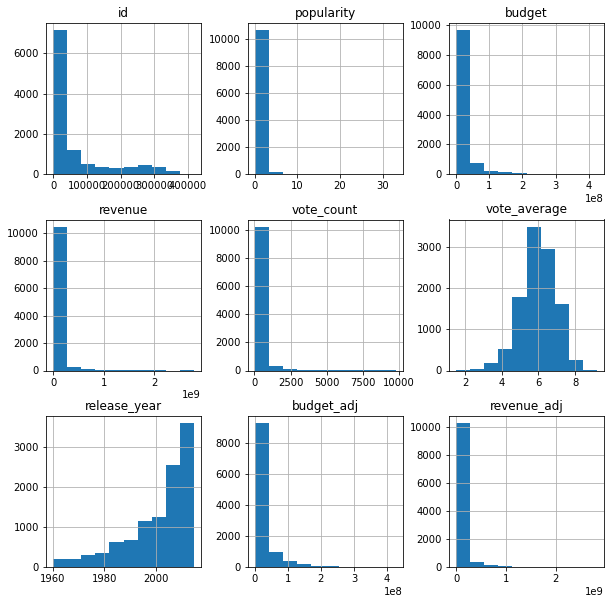

In [165]:
#Making use of histogram to examine the data
df.hist(figsize=(10,10));

### Question 1: What is the relationship between release year and popularity of movies?

In [166]:
#Bringing out the popularity and release year colunm
df_both = df[["original_title", "vote_count", "release_year"]]
df_both.head(20)

,original_title,vote_count,release_year
0,Jurassic World,5562,2015
1,Mad Max: Fury Road,6185,2015
2,Insurgent,2480,2015
3,Star Wars: The Force Awakens,5292,2015
4,Furious 7,2947,2015
5,The Revenant,3929,2015
6,Terminator Genisys,2598,2015
7,The Martian,4572,2015
8,Minions,2893,2015
9,Inside Out,3935,2015


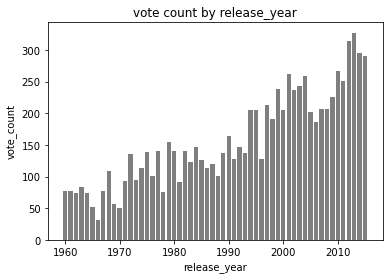

In [167]:
#Grouping a new DataFrame into a new variable release_year
release_df = df.groupby('release_year').mean()
plt.bar(release_df.index, release_df['vote_count'], color = 'black', alpha=0.5)
plt.title('vote count by release_year')
plt.xlabel('release_year')
plt.ylabel('vote_count')
plt.show()

>We have a positive correlation here, such that in the vote count by release year, the movies that were released around 2010 have the highest votecount and the movies that were released in 1960 have the lowest votecount. Shows that as we've come to recent years we have more vote count in movies

### Question 2: Are the movies that used the highest budget also also the movies that got best revenue back?

In [168]:
highest_rev = df.sort_values(by='revenue', ascending=False).head()

In [169]:
def mac():
    return (highest_rev)

In [170]:
mac()

,id,popularity,budget,revenue,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,19995,9.432768,237000000,2781505847,Avatar,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,597,4.355219,200000000,1845034188,Titanic,Drama|Romance|Thriller,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,24428,7.637767,220000000,1519557910,The Avengers,Science Fiction|Action|Adventure,8903,7.3,2012,2.089437e+08,1.443191e+09
0,135397,32.985763,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


<AxesSubplot:title={'center':'original_titlevsrevenue'}, xlabel='original_title'>

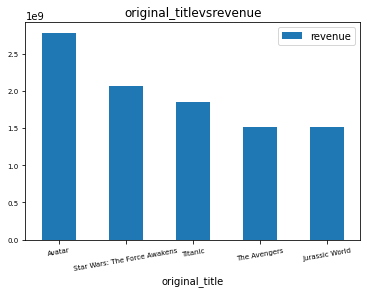

In [171]:
mac().plot(x ="original_title", y ="revenue", title= "original_title" 'vs' "revenue", kind="bar", rot=10, fontsize=7)

In [172]:
#ploting a barchart to see the most budget
highest_budget = df.sort_values(by='budget', ascending=False).head()

<AxesSubplot:xlabel='original_title'>

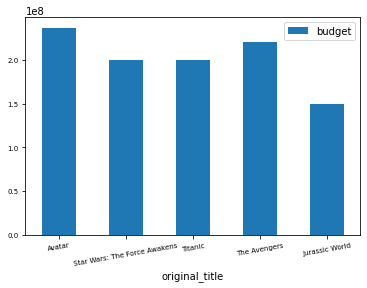

In [173]:
mac().plot(x="original_title", y="budget", kind="bar", rot=10, fontsize=7)

>The bar plot shows that the movie avatar, had the most revenue in the data set, followed by star Wars and titanic and others serially. Avatar, star wars, titanic, Avengers, Jurassic world were also seen as movies with the highest bugdet. Even though Avengers and Jurassic world got almost the same output

<a id='conclusions'></a>
## Conclusions

My first research question "What is the relationship between release year and popularity of movies?" showed how votecount has increased over the years and also grow positively from 1960 to 2010 

My second research question "Are the movies that used the highest budget also also the movies that got best revenue back?" showed that the movies with the highest budget are the ones with highest revenue, even though some movies didn't make much profit
### limitations
All my result are narrow due to the basic data set and no sophisticated enumerations were carried out, the outcome can only serve as a guide and are not generic. Additionally, one has to acknowlege that plenty columns in the data set were dropped because of alot of missing data